<a href="https://colab.research.google.com/github/pdevendragoswami/Image_classification-CNN-DL/blob/main/Cat_Dog_Image_Classification_CNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt

#Download dataset from kaggle

In [44]:
!mkdir -p ~/ .kaggle/

In [45]:
!cp kaggle.json ~/.kaggle/

In [25]:
!chmod 600 /root/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 41.8MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.4MB/s]


#Extracting the data from Zip File

In [27]:
import  zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [110]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    batch_size = 32,
    image_size = (256,256),
    labels = 'inferred',
    label_mode = 'int'
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    batch_size = 32,
    image_size = (256,256),
    labels = 'inferred',
    label_mode = 'int'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [111]:
#for i in train_data:
#  print(i)

#Normalization of Data for faster training

In [112]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

#Model Creation

In [113]:
model = tf.keras.Sequential()

In [114]:
#1st Conv Layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = (3,3),padding = 'valid',activation ='relu',input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))

#2nd Conv Layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))

#3rd Conv Layer
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'))

#Flattening the data for Neural Network
model.add(tf.keras.layers.Flatten())

#Hidden Layer
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))

#Output Layer
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 128)      

In [116]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = 'accuracy')

In [117]:
model.fit(train_data,epochs = 5, validation_data = validation_data)

Epoch 1/5
625/625 [==============================] - 57s 88ms/step - loss: 0.6447 - accuracy: 0.6247 - val_loss: 0.5648 - val_accuracy: 0.7146
Epoch 2/5
625/625 [==============================] - 58s 93ms/step - loss: 0.5014 - accuracy: 0.7559 - val_loss: 0.4691 - val_accuracy: 0.7794
Epoch 3/5
625/625 [==============================] - 54s 86ms/step - loss: 0.3721 - accuracy: 0.8291 - val_loss: 0.5218 - val_accuracy: 0.7764
Epoch 4/5
625/625 [==============================] - 58s 92ms/step - loss: 0.2318 - accuracy: 0.9031 - val_loss: 0.8161 - val_accuracy: 0.7660
Epoch 5/5
625/625 [==============================] - 55s 87ms/step - loss: 0.1229 - accuracy: 0.9528 - val_loss: 0.9268 - val_accuracy: 0.7728


In [118]:
cat_image = plt.imread('/content/cat_image.jpeg')

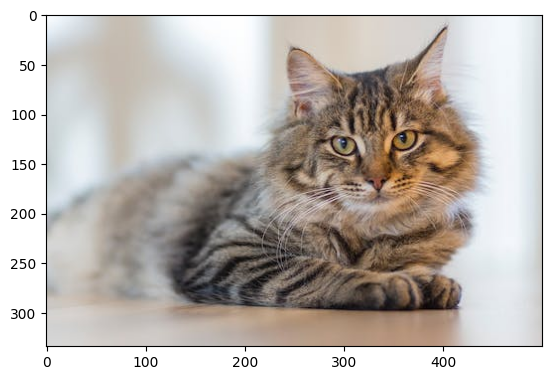

In [119]:
plt.imshow(cat_image)

In [120]:
cat_image.shape

(334, 500, 3)

In [121]:
cat_resize = cv.resize(cat_image,(256,256))

In [122]:
cat_resize.shape

(256, 256, 3)

In [123]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [124]:
pred = model.predict(cat_resize)

1/1 [==============================] - 0s 123ms/step


In [125]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of cat


In [126]:
dog_image = plt.imread('/content/dog_image.jpg')

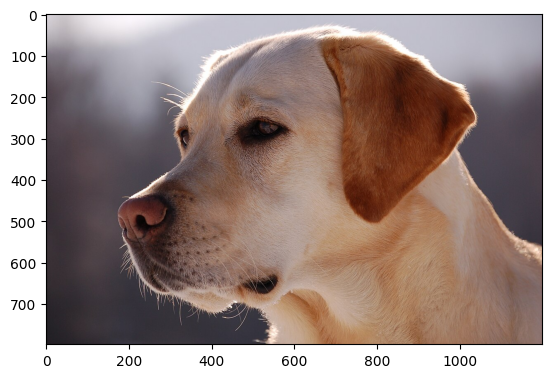

In [127]:
plt.imshow(dog_image)

In [128]:
dog_image.shape

(798, 1200, 3)

In [129]:
dog_resize = cv.resize(dog_image,(256,256))

In [130]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [131]:
dog_resize.shape

(1, 256, 256, 3)

In [132]:
pred = model.predict(dog_resize)

1/1 [==============================] - 0s 22ms/step


In [133]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog
